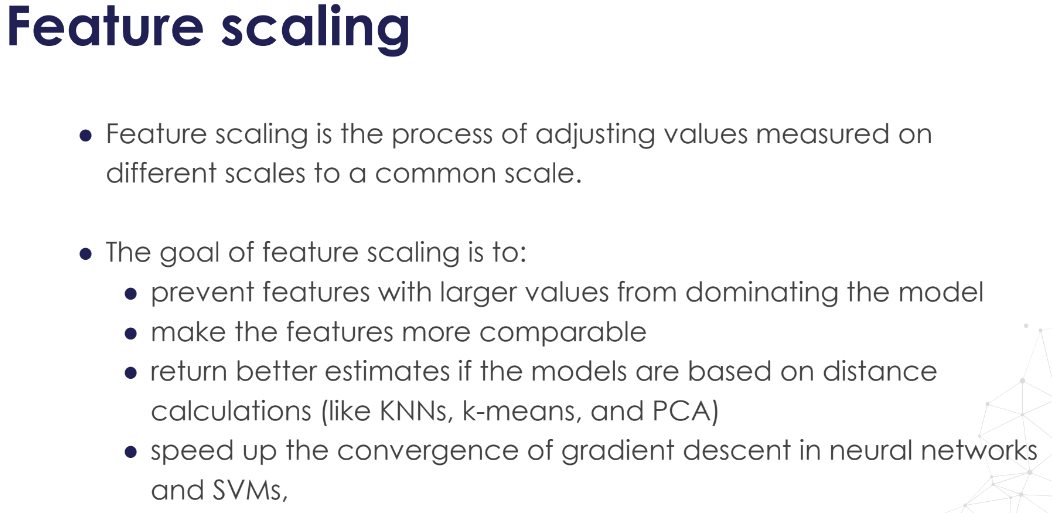

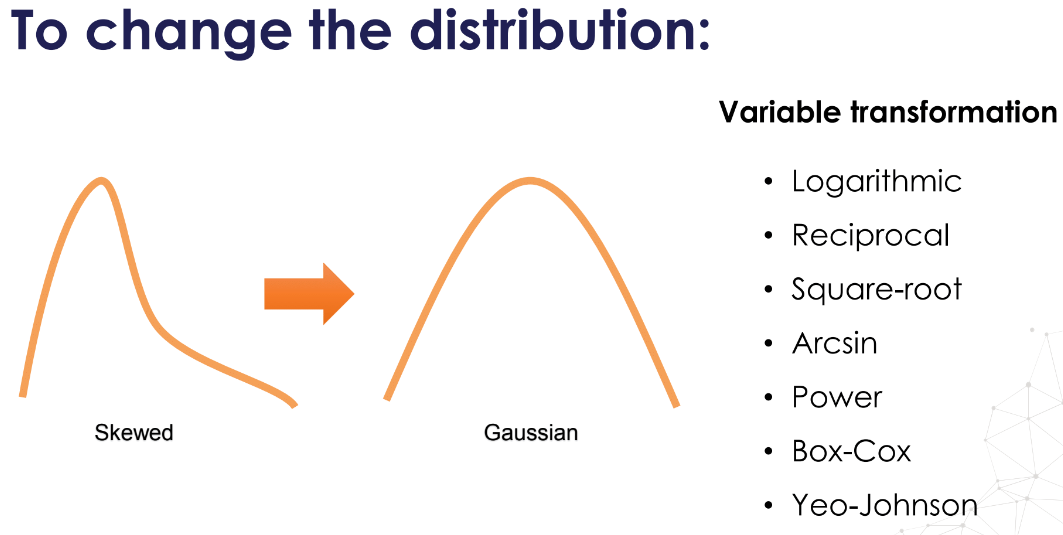

**Scaling Methods**

* **Standardisation**: Adjusts features by removing the mean and scaling to unit variance, making the data have a mean of 0 and a standard deviation of 1, preserves the shape of the original distribution, the minimum and maximum values of the different variables may vary and preserves outliers

* **Mean Normalisation**: Scales features by adjusting them to have a mean of 0 and a range typically between -1 and 1, often using min-max scaling around the mean.
* **Scaling to Maximum and Minimum**: Rescales features to a fixed range, often [0, 1], based on the minimum and maximum values of the feature.
* **Scaling to Absolute Maximum**: Scales features by dividing by the absolute maximum value, adjusting all feature values to be within the range [-1, 1].
* **Scaling to Median and Quantiles**: Rescales features based on median and specified quantiles (e.g., 25th and 75th percentiles) to make them robust to outliers.
* **Scaling to Unit Norm**: Scales features such that the norm (length) of the feature vector is 1, often used in text mining and other high-dimensional data contexts.

# Standarisation
z = (x - x_mean) / std

* centers the mean at 0
* scales the variance at 1
* preserves the shape of the original distribution
* the minimum and maximum values of the different variables may vary
* preserves outliers

Good for algorithms that require features centered at zero.

In [ ]:
# Step 1: Import StandardScaler from sklearn
# Used for standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Step 2: Initialize the StandardScaler
# Set up the scaler to output the results as a pandas DataFrame for easy handling
scaler = StandardScaler().set_output(transform="pandas")

# Step 3: Fit the scaler to the training set
# The scaler will learn the mean and standard deviation of the training set
scaler.fit(X_train)

# Step 4: Transform the training and test sets
# Apply the learned scaling to both training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Retrieve the mean of the features
# The mean values learned from the training set
scaler.mean_

# Step 6: Retrieve the standard deviation of the features
# The standard deviation values learned from the training set
scaler.scale_

# Step 7: Check statistics of the scaled training data
# View summary statistics for the scaled data to ensure it has been standardized
X_train_scaled.describe().round(2)

# Step 8: Visualize the distribution before scaling
# Plot histograms to see the original distribution of the training data
X_train.hist(bins=20, figsize=(10,10))
plt.show()

# Step 9: Visualize the distribution after scaling
# Plot histograms to see how the data looks after standardization
X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

# MinMaxScaling
X_scaled = (X - X.min / (X.max - X.min)

* the minimum and maximum values are 0 and 1.
* does not center the mean at 0
* variance varies across variables
* sensitive outliers

The MinMaxScaler from scikit-learn subtracts the minimum value and re-scales the value range, rendering the variable values between 0 and 1.

In [ ]:
# Step 1: Import MinMaxScaler from sklearn
# MinMaxScaler scales features to a specific range, typically between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Step 2: Set up the MinMaxScaler
# Initialize MinMaxScaler with the output as a pandas DataFrame for easy handling
scaler = MinMaxScaler().set_output(transform="pandas")

# Step 3: Fit the scaler to the training set
# The scaler learns the minimum and maximum values from the training set
scaler.fit(X_train)

# Step 4: Transform the training and test sets
# Apply the learned scaling to both the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Retrieve the maximum values of the features
# The scaler stores the maximum values learned from the training set
scaler.data_max_

# Step 6: Retrieve the minimum values of the features
# The scaler stores the minimum values learned from the training set
scaler.min_

# Step 7: Retrieve the value range (max - min) of the features
# The scaler calculates and stores the range of values for each feature
scaler.data_range_

# Step 8: Check statistics of the scaled training data
# View summary statistics for the scaled data to ensure it is within the desired range
X_train_scaled.describe().round(2)

# Step 9: Visualize the distribution before scaling
# Plot histograms to visualize the original distribution of the training data
X_train.hist(bins=20, figsize=(10,10))
plt.show()

# Step 10: Visualize the distribution after scaling
# Plot histograms to visualize how the data looks after Min-Max scaling
X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

# Mean Normalisation
x_scaled = (x - x_mean) / ( x_max - x_min)


* centers the mean at 0
* variance will be different
* the minimum and maximum values are squeezed between -1 and 1
* preserves outliers
Good for algorithms that require features centered at zero.

In [ ]:
# Step 1: Set up StandardScaler to remove the mean
# StandardScaler will only subtract the mean without dividing by the standard deviation
scaler_mean = StandardScaler(
    with_mean=True,         # Subtracts the mean
    with_std=False          # Does not divide by the standard deviation
).set_output(transform="pandas")

# Step 2: Set up RobustScaler to divide by the range (max - min)
# RobustScaler divides by the range of values (max - min), without removing the median
scaler_minmax = RobustScaler(
    with_centering=False,    # Does not subtract the median
    with_scaling=True,       # Divides by max - min
    quantile_range=(0, 100)  # Uses full range (0th percentile to 100th percentile)
).set_output(transform="pandas")

# Step 3: Fit the scalers to the training data
# Both scalers learn the necessary parameters from the training data
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# Step 4: Transform the training and test sets
# First, apply the mean removal from StandardScaler, then apply scaling from RobustScaler
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

# Step 5: Check the stats of the scaled training data
# Displays the summary statistics of the scaled training data
X_train_scaled.describe().round(2)

# Step 6: Visualize the distribution of the original data
# Plot histograms to show the distribution of the original data before scaling
X_train.hist(bins=20, figsize=(10,10))
plt.show()

# Step 7: Visualize the distribution of the scaled data
# Plot histograms to show the distribution of the data after scaling
X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

# MaxAbsScaling
X_scaled = X / abs(X.max)


The result of the above transformation is a distribution which values vary within the range of -1 to 1. But the mean is not centered at zero and the standard deviation varies across variables.

Scikit-learn suggests that this transformer is meant for data that is centered at zero, and for sparse data.

In [ ]:
# Step 1: Import MaxAbsScaler and StandardScaler
# MaxAbsScaler scales features by their maximum absolute value, maintaining sparsity
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

# Step 2: Set up the MaxAbsScaler
# Initialize MaxAbsScaler to scale data by the maximum absolute value of each feature
scaler = MaxAbsScaler().set_output(transform="pandas")

# Step 3: Fit the scaler to the training set
# The scaler learns the maximum absolute values of features from the training data
scaler.fit(X_train)

# Step 4: Transform the training and test sets
# Apply scaling to the training and test sets using the learned maximum absolute values
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Retrieve the maximum absolute values learned by the scaler
# Displays the maximum absolute values used for scaling
scaler.max_abs_

# Step 6: Check the statistics of the scaled training data
# Provides summary statistics of the scaled training data
X_train_scaled.describe().round(2)

# Step 7: Visualize the distribution of the original data
# Plot histograms to show the distribution of the data before scaling
X_train.hist(bins=20, figsize=(10,10))
plt.show()

# Step 8: Visualize the distribution of the scaled data
# Plot histograms to show the distribution of the data after MaxAbs scaling
X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

## Centering + MaxAbsScaling
We can center the distributions at zero and then scale to its absolute maximum, as recommended by Scikit-learn by combining the use of 2 transformers.

# RobustScaling
X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

In this procedure the median is removed from the observations and then they are scaled to the inter-quantile range (IQR). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

This robust scaling method produces more robust estimates for the center and range of the variable, and is recommended if the data shows outliers.

In [ ]:
# Step 1: Import RobustScaler
# RobustScaler scales features using the median and interquartile range (IQR), making it robust to outliers
from sklearn.preprocessing import RobustScaler

# Step 2: Set up the RobustScaler
# Initialize RobustScaler to scale features based on the median and IQR
scaler = RobustScaler().set_output(transform="pandas")

# Step 3: Fit the scaler to the training data
# The scaler learns the median and IQR of each feature from the training data
scaler.fit(X_train)

# Step 4: Transform the training and test data
# Apply RobustScaler to scale the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Retrieve the median values learned by the scaler
# Displays the median values used for scaling
scaler.center_

# Step 6: Retrieve the IQR values learned by the scaler
# Displays the IQR values used for scaling
scaler.scale_

# Step 7: Convert scaled NumPy arrays to DataFrames
# Transform the scaled NumPy arrays to DataFrames for easier manipulation and viewing
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Step 8: Check the statistics of the scaled training data
# Display summary statistics of the scaled training data
X_train_scaled.describe().round(2)

# Step 9: Visualize the distribution of the original data
# Plot histograms to show the distribution of the original data before scaling
X_train.hist(bins=20, figsize=(10,10))
plt.show()

# Step 10: Visualize the distribution of the scaled data
# Plot histograms to show the distribution of the data after scaling
X_train_scaled.hist(bins=20, figsize=(10,10))
plt.show()

# Side note
Scalling dummy variables that originated from categorical variables is often not neccesary. Other scalling methods for NLP can be seen below

**Additional references**
* [Scaling categorical variables](https://www.udemy.com/course/feature-engineering-for-machine-learning/learn/lecture/37250790#questions/3272310)
* [Scaling to vector unit length / unit norm](https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/Section-18-Feature-Scaling/06-Scaling-to-unit-length.ipynb)

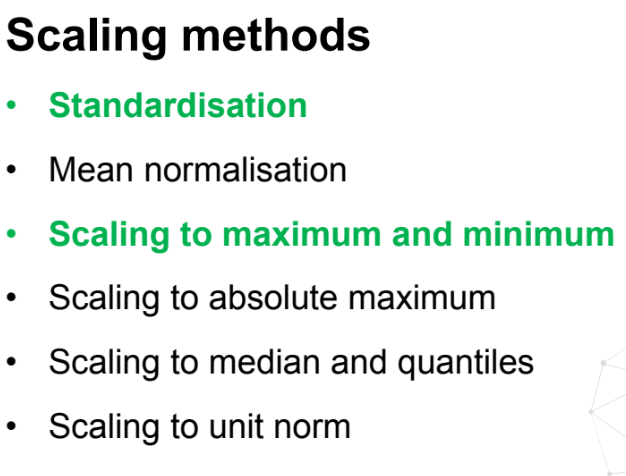